In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
sales = pd.read_csv('E5.csv')

In [18]:
sales

,ds,y,ystand
0,1992-01-01,146376,11.893934
1,1992-02-01,147079,11.898725
2,1992-03-01,159336,11.978770
3,1992-04-01,163669,12.005601
4,1992-05-01,170068,12.043954
...,...,...,...
288,2016-01-01,400928,12.901537
289,2016-02-01,413554,12.932543
290,2016-03-01,460093,13.039184
291,2016-04-01,450935,13.019078


In [4]:
sales['ystand'] = np.log(sales['y'])

<AxesSubplot:>

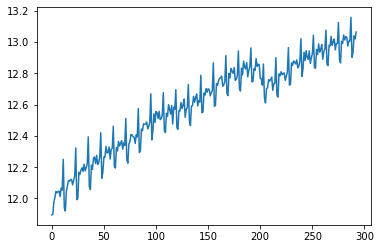

In [5]:
sales['ystand'].plot()

In [7]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [8]:
df = sales[['ds','ystand']]

In [11]:
df.columns = ['ds','y']

In [12]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=6, freq='M')
future.tail()

,ds
294,2016-06-30
295,2016-07-31
296,2016-08-31
297,2016-09-30
298,2016-10-31


In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,13.057700,13.037656,13.077882
295,2016-07-31,13.082357,13.062860,13.104099
296,2016-08-31,13.015546,12.995441,13.037505
297,2016-09-30,13.037862,13.018001,13.058840
298,2016-10-31,13.055691,13.035248,13.077347


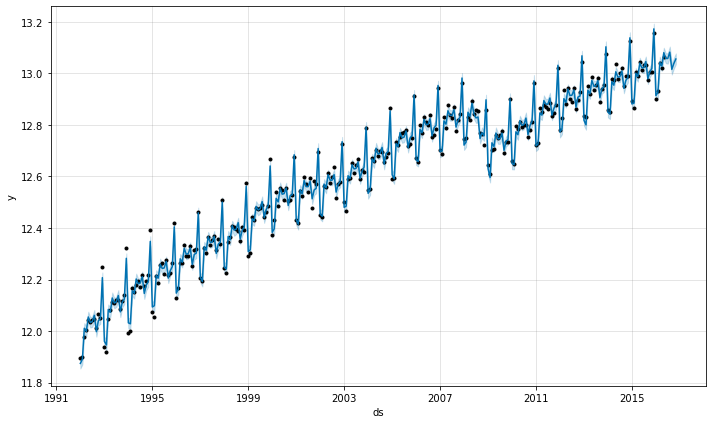

In [16]:
fig1 = m.plot(forecast)

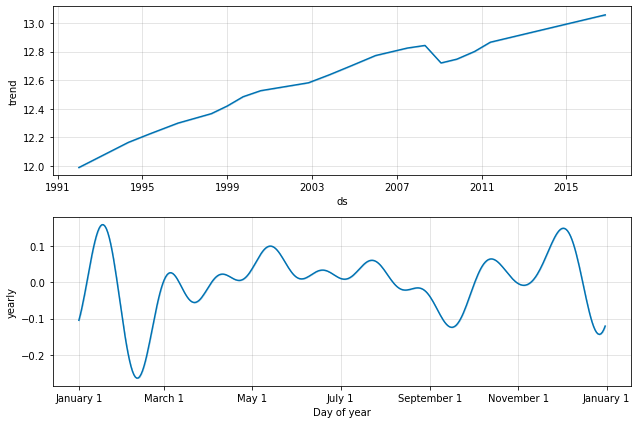

In [17]:
m.plot_components(forecast);

In [22]:
import math

In [20]:
predictSales = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [24]:
predictSales['Sales'] = math.exp(1)**predictSales['yhat']

In [25]:
predictSales

,ds,yhat,yhat_lower,yhat_upper,Sales
294,2016-06-30,13.057700,13.037656,13.077882,468691.356647
295,2016-07-31,13.082357,13.062860,13.104099,480391.638076
296,2016-08-31,13.015546,12.995441,13.037505,449345.055888
297,2016-09-30,13.037862,13.018001,13.058840,459485.022441
298,2016-10-31,13.055691,13.035248,13.077347,467751.040477
